<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

  Using cached yfinance-0.1.67-py2.py3-none-any.whl (25 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
usage: mamba [-h] [--version] [--slow SLOW] [--enable-coverage]
             [--coverage-file COVERAGE_FILE] [--format FORMAT] [--no-color]
             [--tags TAGS]
             [specs ...]
mamba: error: unrecognized arguments: -y
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.0
    Uninstalling nbformat-5.7.0:
      Successfully uninstalled nbformat-5.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
jupyter-server 1.23.4 requires nbformat>=5.2.0, but you have nbformat 4.2.0 which is incompatible.
nbclient 0.5.13 requires nbformat>=5.0, but you have nbformat

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [2]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [3]:
pip install yfinance upgrade

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade yfinance


Note: you may need to restart the kernel to use updated packages.


## Question 1: Use yfinance to Extract Stock Data


In [5]:
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract Tesla stock data for the maximum time period
tesla_data = tesla.history(period="max")

# Reset the index of the tesla_data DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())



                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")


In [7]:
shopify = yf.Ticker ("SHOP")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [8]:
# Use the ticker object to extract Tesla stock data for the maximum time period
tesla_data = tesla.history(period="max")


In [9]:
shopify_data = shopify.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [10]:
# Reset the index of the tesla_data DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [11]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text content of the response as html_data
    html_data = response.text
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

# Now you have the webpage content in the html_data variable
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL and get the HTML content
response = requests.get(url)
html_data = response.text

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find all tables in the HTML content
tables = soup.find_all('table')

# Extract the table that contains Tesla Revenue data
tesla_table = None
for table in tables:
    if "Tesla" in table.get_text():
        tesla_table = table
        break

# Use pandas read_html to parse the table and convert it into a DataFrame
if tesla_table:
    tesla_revenue = pd.read_html(str(tesla_table))[0]
    # Rename columns to 'Date' and 'Revenue'
    tesla_revenue.columns = ['Date', 'Revenue']
    # Display the first few rows of the tesla_revenue DataFrame
    print(tesla_revenue.head())
else:
    print("Tesla Revenue table not found on the webpage.")


   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Parse the html data using `beautiful_soup`.


In [12]:
pip install beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [13]:
from bs4 import BeautifulSoup


soup = BeautifulSoup(html_data, 'html.parser')




Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [14]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL and get the HTML content
response = requests.get(url)
html_data = response.text

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')


table = soup.find('table')

#
tesla_revenue = pd.read_html(str(table))[0]


tesla_revenue.columns = ['Date', 'Revenue']

Remove commas and dollar signs from the 'Revenue' column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('[\$,]', '', regex=True)


tesla_revenue.dropna(subset=['Revenue'], inplace=True)

#
print(tesla_revenue.head())



   Date Revenue
0  2021   53823
1  2020   31536
2  2019   24578
3  2018   21461
4  2017   11759


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [15]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)


Execute the following lines to remove an null or empty strings in the Revenue column.


In [16]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [17]:

print(tesla_revenue.tail())


    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [21]:
import yfinance as yf


gme = yf.Ticker("GME")


gme_data = gme.history(period="max")


gme_data.reset_index(inplace=True)


print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [19]:
import yfinance as yf

gme = yf.Ticker("GME")


gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [20]:
import requests


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"


response = requests.get(url)


if response.status_code == 200:
  
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [21]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')



Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [22]:
import pandas as pd
from bs4 import BeautifulSoup
import requests


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"


response = requests.get(url)
html_data = response.text


soup = BeautifulSoup(html_data, 'html.parser')


table_bodies = soup.find_all("tbody")


if len(table_bodies) > 1:
    table = table_bodies[1]

    # Extract rows from the table
    rows = table.find_all('tr')

    # Initialize empty lists to store data
    dates = []
    revenues = []

    # Loop through rows and extract data
    for row in rows:
        columns = row.find_all('td')
        if len(columns) == 2:
            date = columns[0].get_text(strip=True)
            revenue = columns[1].get_text(strip=True)

            # Append data to lists
            dates.append(date)
            revenues.append(revenue)

    # Create a DataFrame from the extracted data
    gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

    # Remove commas and dollar signs from the Revenue column
    gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('[\$,]', '', regex=True)

    # Display the first few rows of the gme_revenue DataFrame
    print(gme_revenue.head())

else:
    print("No table found at index 1.")


         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [23]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# URL of the webpage to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL and get the HTML content
response = requests.get(url)
html_data = response.text

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find all tables in the HTML
tables = soup.find_all('table')

# Initialize an empty DataFrame
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Iterate through tables to find the one containing GameStop Revenue
for table in tables:
    # Extract rows from the table
    rows = table.find_all('tr')

    # Initialize empty lists to store data
    dates = []
    revenues = []

    # Loop through rows and extract data
    for row in rows:
        columns = row.find_all('td')
        if len(columns) == 2:
            date = columns[0].get_text(strip=True)
            revenue = columns[1].get_text(strip=True)

            # Append data to lists
            dates.append(date)
            revenues.append(revenue)

    # Check if the table matches the structure of GameStop Revenue data
    if len(dates) > 0 and len(revenues) > 0:
        gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})
        gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('[\$,]', '', regex=True)
        break  # Exit the loop once we've found the table

# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())


    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


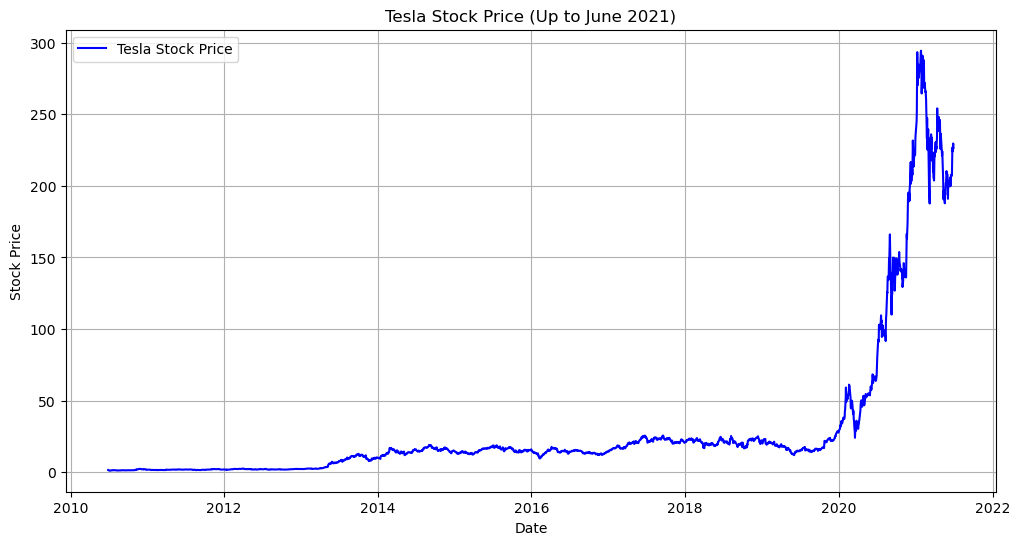

In [24]:
import matplotlib.pyplot as plt


# Filter data up to June 2021
tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Plotting the stock data
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Tesla Stock Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Tesla Stock Price (Up to June 2021)')
plt.legend()
plt.grid(True)

# Display the graph
plt.show()


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


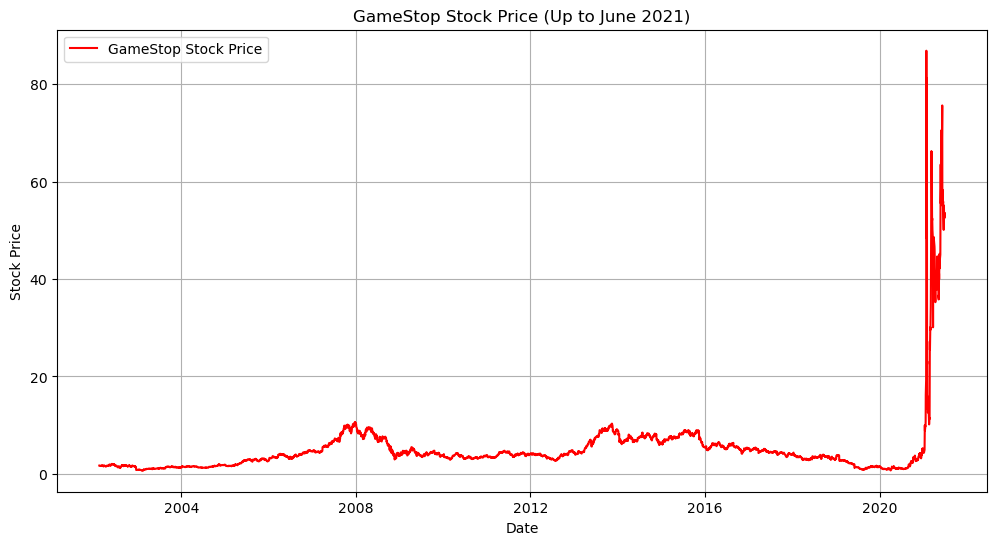

In [25]:
import matplotlib.pyplot as plt

gme_data = gme_data[gme_data['Date'] <= '2021-06-30']

# Plotting the stock data
plt.figure(figsize=(12, 6))
plt.plot(gme_data['Date'], gme_data['Close'], label='GameStop Stock Price', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('GameStop Stock Price (Up to June 2021)')
plt.legend()
plt.grid(True)

# Display the graph
plt.show()


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
